In [10]:
# # Extend the Archive by 1 day
# archv = c3.HindcastArchive.get(id)
# new = c3.TimeRange(
#     start = archv.subsetOptions.timeRange.start,
#     end = archv.subsetOptions.timeRange.end + timedelta(days=1)
# )
# archv.updateTimeRange(new)

In [15]:
import sys
from ocean_navigation_simulator.problem import Problem
from ocean_navigation_simulator import OceanNavSimulator
from datetime import datetime, timezone, timedelta
from ocean_navigation_simulator.planners import HJReach2DPlanner
import numpy as np
from datetime import datetime, timezone

import hj_reachability as hj
import time

# Desired Workflow

In [16]:
# Step 1: Settings to feed into the planner
# Set the platform configurations
platform_config_dict = {'battery_cap': 20.0, 'u_max': 0.1, 'motor_efficiency': 1.0,
                        'avg_solar_power': 10.0, 'drag_factor': 10.0}

# Create the navigation problem
t_0 = datetime(2021, 9, 9, 12, 10, 10, tzinfo=timezone.utc)
x_0 = [-88.0, 25.0, 1]  # lon, lat, battery
x_T = [-89.5, 26.5]
plan_on_gt = True

# Download the respective files
hindcast_dict = DownloadHindcastFilesToLocal(t_0, x_0=x_0[:2], x_T=x_T[:2],
                                             n_days_ahead=10, local_folder='/tmp/hindcasts')
if not plan_on_gt:
    forecast_dict = c3.DownloadForecastFilesToLocal(t_0, x_0, x_T, n_days_ahead, local_folder='/tmp/forecasts')

prob = Problem(x_0, x_T, t_0,
               platform_config_dict=platform_config_dict,
               hindcast_folder = '/tmp/hindcasts/',
               forecast_folder = '/tmp/forecasts/',
               plan_on_gt = plan_on_gt,
               forecast_delay_in_h=0)

A total of 11 Hindcast files were downloaded to /tmp/hindcasts
Navigate from [-88.0, 25.0, 1] at time 2021-09-09 12:10:10+00:00 to [-89.5, 26.5].
Simulate with GT current files from 2021-09-04 00:00:00+00:00 to 2021-09-19 23:00:00+00:00
Planning on GT.


Note only the GT hindcast data is currently visualized
Subsetted data from 2021-09-09 12:00:00 UTC to 2021-09-14 13:00:00 UTC in 122 time steps of 1.00 hour(s) resolution


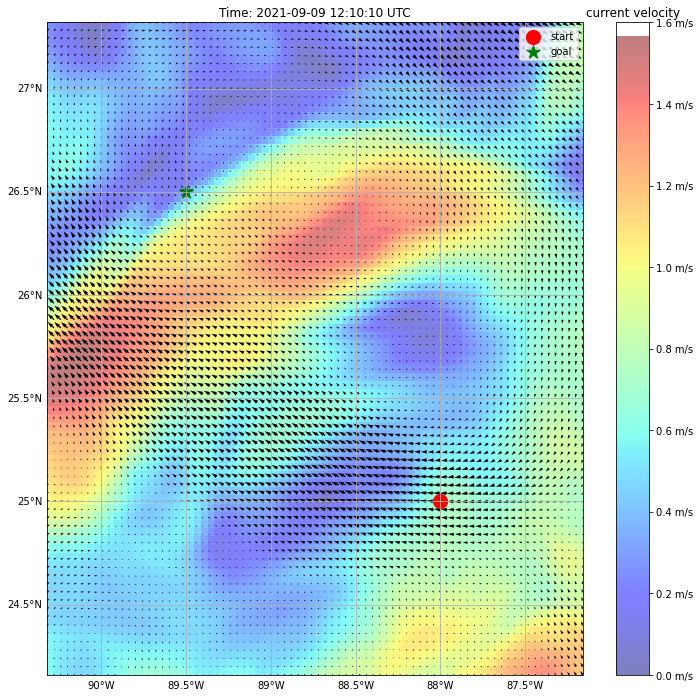

In [19]:
prob.viz()

In [17]:
# Step 2: Initialize Simulator and run it
sim = OceanNavSimulator(sim_config_dict="simulator.yaml", control_config_dict='reach_controller.yaml', problem=prob)
sim.run(T_in_h=100)
# while sim.terminated is not True:
#     # run until new data is needed
#     checkpoint_dict = sim.run(T_in_h=70)
#     pickle.dump(checkpoint_dict)
#     if checkpoint_dict['load_new_data'] is True:
#         # download new data using the data in the data_needed (dict or whatever it'll be)
#         x_t = sim.current_state
#         sim.problem.hindcast_dict = c3.DownloadHindcastFilesToLocal(x_t[3], x_t[:3], x_T, n_days_ahead)
#         sim.problem.forecast_dict = c3.DownloadForecastFilesToLocal(x_t[3], x_t[:3], x_T, n_days_ahead)
#         sim.continue_running(T_in_h=70)

# Simulation is done now

Subsetted data from 2021-09-09 12:00:00 UTC to 2021-09-13 13:00:00 UTC in 98 time steps of 1.00 hour(s) resolution
Running Open-Loop Control without a tracking controller.
updating forecast dicts
Reachability Planner: Loading new current data.
Subsetted data from 2021-09-09 12:00:00 UTC to 2021-09-13 17:00:00 UTC in 102 time steps of 1.00 hour(s) resolution


2021-12-05 08:22:14.165839: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:55] 
********************************
Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
Compiling module jit__solve__2.47976
********************************
100%|##########|  1.0000/1.0 [00:23<00:00, 23.29s/sim_s]


High-level planner & tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking controller replanned
Sim step
Sim step
Sim step
Tracking c

False

/home/c3/.conda/envs/py-ocean_sim_cpu_test/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.

/home/c3/.conda/envs/py-ocean_sim_cpu_test/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.



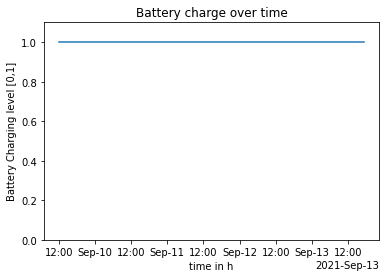

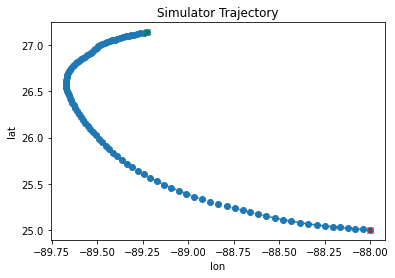

<Figure size 432x288 with 0 Axes>

/home/c3/.conda/envs/py-ocean_sim_cpu_test/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.

/home/c3/.conda/envs/py-ocean_sim_cpu_test/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.



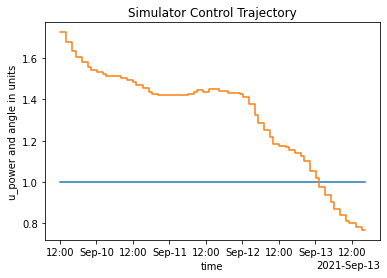

Plotting 2D trajectory with the true currents at time_for_currents/t_0
Subsetted data from 2021-09-09 12:00:00 UTC to 2021-09-09 18:00:00 UTC in 7 time steps of 1.00 hour(s) resolution


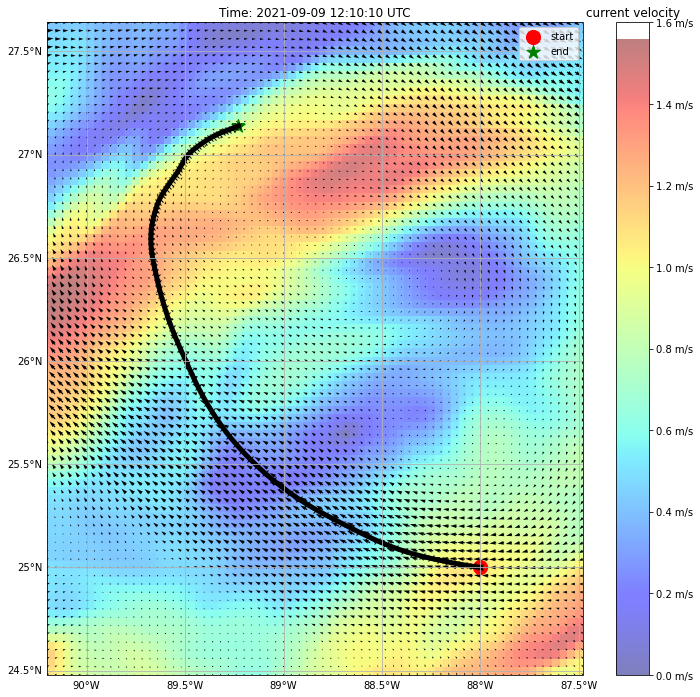

Plotting 2D trajectory with the true currents at time_for_currents/t_0
Subsetted data from 2021-09-09 12:00:00 UTC to 2021-09-09 18:00:00 UTC in 7 time steps of 1.00 hour(s) resolution


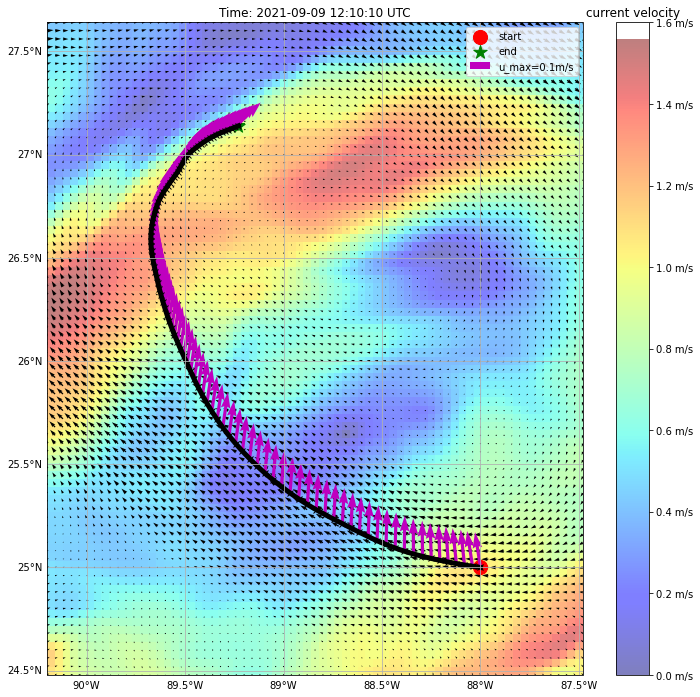

In [18]:
sim.plot_trajectory(plotting_type='battery')
# # # plot 2D Trajectory without background currents
sim.plot_trajectory(plotting_type='2D')
# # plot control over time
sim.plot_trajectory(plotting_type='ctrl')
# # plot 2D Trajectory with currents at t_0
sim.plot_trajectory(plotting_type='2D_w_currents')
# # plot 2D Trajectory with currents at t_0 and control_vec for each point
sim.plot_trajectory(plotting_type='2D_w_currents_w_controls')

In [167]:
# Code to implement for this:
# 1) the C3 utilities functions to download stuff
# c3.DownloadHindcastFilesToLocal(t_0, x_0, x_T, n_days_ahead)
# c3.DownloadForecastFilesToLocal(t_0, x_0, x_T, n_days_ahead)
# ==> DONE!

# 2) Modify Problem Class.
# => Done

# 3) Modify the data_subsetting function to strip out all c3 stuff!
# => Done

# 4) Adjust the simulator to deal with new set-up
# => Done
# 4.1) Debug the simulator: seems like something broke from the whole migration to new subsetting functionality...
# ==> Done
# 5) refactor the simulator to realize when it needs new data and return a checkpoint_dict for that

# 1) Hindcast Downloading to Local function

In [12]:
# Function inputs
from datetime import datetime, timezone, timedelta
t_0 = datetime(2021, 9, 10, 12, 10, 10, tzinfo=timezone.utc)
x_0 = [-88.0, 25.0, 1]  # lon, lat, battery
x_T = [-88.2, 26.3]

n_days_ahead = 5

# # Uses fastest environment if not possible in hycom
# @py(env='hycom_1_0_0')
# DownloadHindcastFilesToLocal: inline function(t_0: !datetime, x_0: any, x_T: any, n_days_ahead: !integer): any

In [13]:
# Helper Functions
import netCDF4 as nc
import os
from os.path import exists
def check_if_point_is_in_geospatialCoverage(geospatialCoverage, point):
    """Helper function checking if the point is in the spatial coverage of a file.
    Returns True if yes and False if not."""
    lon_covered = geospatialCoverage.start.longitude < point[0] < geospatialCoverage.end.longitude
    lat_covered = geospatialCoverage.start.latitude < point[1] < geospatialCoverage.end.latitude
    # return of throw an error
    if lon_covered and lat_covered:
        return True
    elif lon_covered is False:
        raise ValueError("The point {} is not covered by the longitude of the file.".format(point))
    elif lat_covered is False:
        raise ValueError("The point {} is not covered by the latitude of the file.".format(point))

def download_file_to_local(url, local_folder='/tmp/hindcast'):
    """ Helper Method to download HYCOM files from blob storage to local storage.
    If it does not already exist in the local_folder.
    
    Input: 
        url             url of the file
        local_folder    folder where the file is stored locally
    Output:
        local_path      path to access the file locally
    """
    filename = os.path.basename(url)
    local_path = local_folder + '/' + filename
    # Check if file already exists and do not reload if it does.
    if exists(local_path):
        return local_path
    # Download file to local
    c3.Client.copyFilesToLocalClient(url, local_folder)
    return local_path

In [14]:
def DownloadHindcastFilesToLocal(t_0, x_0, x_T, n_days_ahead, local_folder='/tmp/hindcasts'):
    """Function to download the relevant files from the HindcastFile database to the local folder and return a dict
    Note: right now there is no spatial sub-selecting happening, only checking if both x_0 and x_T are contained.
    In future versions when we have larger spatial areas this well be necessary.
    
    Args:
        t_0             datetime object of starting time
        x_0             [lon, lat] of starting point
        x_T             [lon, lat] of target point
        n_days_ahead    integer of number of days ahead the of t_0 the relevant files should be downloaded
        
    Returns:
        hindcast_dicts  a sorted list of dicts of relevant files containing {'t_range': t_range, 'file': local_path}
    """
    
    # Step 1: get required file references and data from C3 file DB
    # Step 1.1: Getting time and formatting for the db query
    start = t_0
    end = t_0 + timedelta(days=n_days_ahead)
    
    # Step 1.2: Getting correct range of nc files from database
    filter_string = 'start>=' + '"' + start.strftime("%Y-%m-%d") + '"' + \
                    ' && end<=' + '"' + end.strftime("%Y-%m-%d") + "T23:00:00.000" + '"' \
                                                                                     ' && status==' + '"' + 'downloaded' + '"'

    # Note: later with datasets in multiple geographies we need to check to download in the relevant regions
    objs_list = c3.HindcastFile.fetch({'filter': filter_string, "order": "start"}).objs

    # some basic sanity checks
    if objs_list is None:
        raise ValueError("No files in the database for the selected t_interval")
    if len(objs_list) != (end - start).days + 1:
        raise ValueError("DB Query didn't return the expected number of files (one per day), check DB and code.")
    # check geospatial coverage based on first file. Will raise an error if not.
    check_if_point_is_in_geospatialCoverage(objs_list[0].subsetOptions.geospatialCoverage, x_0)
    check_if_point_is_in_geospatialCoverage(objs_list[0].subsetOptions.geospatialCoverage, x_T)
    
    # Step 2: Create an ordered list of hindcast dicts
    hindcast_dicts = []
    for run in objs_list:
        t_range = [run.subsetOptions.timeRange.start, run.subsetOptions.timeRange.end]
        hindcast_dicts.append({'t_range': t_range, 'file': run.file.url})

    # sorting after t_range start (doubling because already in db query but to be safe)
    hindcast_dicts.sort(key=lambda dict: dict['t_range'][0])
    
    # Step 3: check if time is continous between them/exactly 1h apart
    for idx in range(len(hindcast_dicts) - 1):
        if hindcast_dicts[idx]['t_range'][1] + timedelta(hours=1) == hindcast_dicts[idx + 1]['t_range'][0]:
            continue
        else:
            raise ValueError("The hindcast files are not consecutive in time (t_range), check files.")
    
    # Step 4: download the files to local and update the dict with the local path
    for dic in hindcast_dicts:
        local_path = download_file_to_local(url=dic['file'], local_folder=local_folder)
        dic['file'] = local_path
        
    # Step 5: Logging
    print("A total of {} Hindcast files were downloaded to {}".format(len(hindcast_dicts), local_folder))

    return hindcast_dicts

In [94]:
hindcasts_dicts = DownloadHindcastFilesToLocal(t_0, x_0=x_0[:2], x_T=x_T[:2], n_days_ahead=5, local_folder='/tmp/hindcasts')

A total of 6 Hindcast files were downloaded to /tmp/hindcasts


In [95]:
hindcasts_dicts

[{'t_range': [datetime.datetime(2021, 9, 10, 0, 0),
   datetime.datetime(2021, 9, 10, 23, 0)],
  'file': '/tmp/hindcasts/GOMu0.04-expt_90.1m000-2021-2021-09-10T00:00:00Z-2021-09-10T23:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 9, 11, 0, 0),
   datetime.datetime(2021, 9, 11, 23, 0)],
  'file': '/tmp/hindcasts/GOMu0.04-expt_90.1m000-2021-2021-09-11T00:00:00Z-2021-09-11T23:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 9, 12, 0, 0),
   datetime.datetime(2021, 9, 12, 23, 0)],
  'file': '/tmp/hindcasts/GOMu0.04-expt_90.1m000-2021-2021-09-12T00:00:00Z-2021-09-12T23:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 9, 13, 0, 0),
   datetime.datetime(2021, 9, 13, 23, 0)],
  'file': '/tmp/hindcasts/GOMu0.04-expt_90.1m000-2021-2021-09-13T00:00:00Z-2021-09-13T23:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 9, 14, 0, 0),
   datetime.datetime(2021, 9, 14, 23, 0)],
  'file': '/tmp/hindcasts/GOMu0.04-expt_90.1m000-2021-2021-09-14T00:00:00Z-2021-09-14T23:00:00Z.nc'},
 {'t_range': [d

# 2) Forecasts Downloading to Local function

In [15]:
# Function inputs
from datetime import datetime, timezone, timedelta
t_0 = datetime(2021, 11, 22, 12, 10, 10, tzinfo=timezone.utc)
x_0 = [-88.0, 25.0, 1]  # lon, lat, battery
x_T = [-88.2, 26.3]

n_days_ahead = 5

local_folder = '/tmp/forecasts'

In [34]:
def DownloadForecastFilesToLocal(t_0, x_0, x_T, n_days_ahead, local_folder='/tmp/forecasts'):
    """Function to download the relevant files from the HycomFMRC database to the local folder and return a dict
    Note: right now there is no spatial sub-selecting happening, only checking if both x_0 and x_T are contained.
    In future versions when we have larger spatial areas this well be necessary.
    
    Args:
        t_0             datetime object of starting time
        x_0             [lon, lat] of starting point
        x_T             [lon, lat] of target point
        n_days_ahead    integer of number of days ahead the of t_0 the relevant files should be downloaded
        
    Returns:
        forecast_dicts  a sorted list of dicts of relevant files containing {'t_range': t_range, 'file': local_path}
    """
    # Step 1: get all relevant forecasts including most recent at t_0 and all the ones after
    from_run_onwards = t_0 - timedelta(days=1)
    filter_string = 'runDate>=' + '"' + from_run_onwards.strftime("%Y-%m-%dT%H:%M:%S") + '"'
    objs_list = c3.HycomFMRC.fetch(spec={'include': "[this, fmrcFiles.file]",
                                         'filter': filter_string,
                                         "order": "runDate"}
                                   ).objs

    # basic sanity check
    if objs_list is None:
        raise ValueError("No forecast runs in the database for and after the selected start_time")
    if len(objs_list) < n_days_ahead:
        raise ValueError("DB does not contain forecasts for the {} n_days_ahead.")
    # check if first forecast file contains t_0
    if not (objs_list[0].timeCoverage.start < t_0 and objs_list[0].timeCoverage.end > t_0):
        raise ValueError("First Forecast File retreived does not contain t_0.")
    # check geospatial coverage based on first file. Will raise an error if not.
    first_FMRC_geo_coverage = c3.FMRCFile.get(objs_list[0].fmrcFiles[0].id).subsetOptions.geospatialCoverage
    check_if_point_is_in_geospatialCoverage(first_FMRC_geo_coverage, x_0)
    check_if_point_is_in_geospatialCoverage(first_FMRC_geo_coverage, x_T)

    # Step 2: create a list of dicts with one dict for each run
    forecast_dicts = []
    for run in objs_list:
        t_range = [run.timeCoverage.start, run.timeCoverage.end]
        forecast_dicts.append({'t_range': t_range, 'file': run.fmrcFiles[0].file.url})

    # sorting after t_range start (doubling because already in db query but to be safe)
    forecast_dicts.sort(key=lambda dict: dict['t_range'][0])

    # Step 3: check if the n_days_ahead files are exactly 1 day apart
    for idx in range(n_days_ahead - 1):
        if forecast_dicts[idx]['t_range'][0] + timedelta(days=1) == forecast_dicts[idx + 1]['t_range'][0]:
            continue
        else:
            raise ValueError("The first n_days_ahead forecast files start not exactly 1 day apart (t_range), check files in DB.")

    # Limit download to n_days_ahead
    forecast_dicts = forecast_dicts[:n_days_ahead]

    # Step 4: download the files to local and update the dict with the local path
    for dic in forecast_dicts:
        local_path = download_file_to_local(url=dic['file'], local_folder=local_folder)
        dic['file'] = local_path

    # Step 5: Logging
    print("A total of {} Forecast files were downloaded to {}".format(len(forecast_dicts), local_folder))

    return forecast_dicts

In [35]:
fmrc_dicts = DownloadForecastFilesToLocal(t_0, x_0=x_0[:2], x_T=x_T[:2], n_days_ahead=n_days_ahead, local_folder=local_folder)

A total of 5 Forecast files were downloaded to /tmp/forecasts


In [18]:
fmrc_dicts

[{'t_range': [datetime.datetime(2021, 11, 22, 12, 0, tzinfo=datetime.timezone.utc),
   datetime.datetime(2021, 11, 28, 0, 0, tzinfo=datetime.timezone.utc)],
  'file': '/tmp/forecasts/GOMu0.04_901m000_FMRC_RUN_2021-11-22T12:00:00Z-2021-11-22T12:00:00Z-2021-11-28T00:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 11, 23, 12, 0, tzinfo=datetime.timezone.utc),
   datetime.datetime(2021, 11, 28, 12, 0, tzinfo=datetime.timezone.utc)],
  'file': '/tmp/forecasts/GOMu0.04_901m000_FMRC_RUN_2021-11-23T12:00:00Z-2021-11-23T12:00:00Z-2021-11-28T12:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 11, 24, 12, 0, tzinfo=datetime.timezone.utc),
   datetime.datetime(2021, 11, 30, 0, 0, tzinfo=datetime.timezone.utc)],
  'file': '/tmp/forecasts/GOMu0.04_901m000_FMRC_RUN_2021-11-24T12:00:00Z-2021-11-24T12:00:00Z-2021-11-30T00:00:00Z.nc'},
 {'t_range': [datetime.datetime(2021, 11, 25, 12, 0, tzinfo=datetime.timezone.utc),
   datetime.datetime(2021, 12, 1, 0, 0, tzinfo=datetime.timezone.utc)],
  'file':

In [166]:
# fmrc_dicts

# New Problem Class

In [3]:
import netCDF4
import numpy as np
from datetime import datetime, timezone, timedelta
import math

In [4]:
class Problem:
    """A path planning problem for a Planner to solve.

    Attributes:
        x_0:
            The starting state, represented as (lat, lon, battery_level).
            Note that time is implemented as absolute time in POSIX.
        x_T:
            The target state, represented as (lon, lat).
            # TODO: currently we do point-2-point navigation though ultimately we'd like to do point to region
            this to be a set representation (point-2-region) because that is the more general formulation.
        t_0:
            A timezone aware datetime object of the absolute starting time of the platform at x_0

        platform_config_dict:
            A dict specifying the platform parameters, see the repos 'configs/platform.yaml' as example.
        
        hindcasts_dicts and forecasts_dicts
            A list of dicts ordered according to the starting time-range.
            One dict for each hindcast/forecast file available. The dicts for each hindcast file contains: 
            {'t_range': [<datetime object>, <datetime object>], 'file': <filepath>})
            
        plan_on_gt:
            if True we only use hindcast data and plan on hindcasts. If False we use forecast data for the planner.

        # TO IMPLEMENT USAGE/FOR FUTURE
        forecast_delay_in_h:
            The hours of delay when a forecast becomes available
            e.g. forecast starts at 1st of Jan but only available from HYCOM 48h later on 3rd of January
        noise:
            # TODO: optionally implement a way to add noise to the hindcasts

        # TO REVIEW/THINK ABOUT
        x_t_tol:
            Radius around x_T that when reached counts as "target reached"
            # Note: not used currently as the sim config has that value too.
    """

    def __init__(self, x_0, x_T, t_0, platform_config_dict, 
                 hindcast_folder, forecast_folder,
                 plan_on_gt=False, forecast_delay_in_h=0., noise=None, x_t_tol=0.1):

        # Plan on GT
        self.plan_on_gt = plan_on_gt

        # Basic check of inputs
        if len(x_0) != 3 or len(x_T) != 2:
            raise ValueError("x_0 should be (lat, lon, battery) and x_T (lat, lon)")

        # check t_0
        if t_0.tzinfo is None:
            print("Assuming input t_0 is in UTC time.")
            t_0 = t_0.replace(tzinfo=timezone.utc)
        elif t_0.tzinfo != timezone.utc:
            raise ValueError("Please provide t_0 as UTC or naive datetime object.")

        # Log start, goal and forecast delay.
        self.t_0 = t_0
        self.x_0 = x_0 + [t_0.timestamp()]
        self.x_T = x_T
        self.forecast_delay_in_h = forecast_delay_in_h
        
        # Initialize the data dicts with None
        self.hindcasts_dicts, self.hindcast_grid_dict, self.forecasts_dicts, self.most_recent_forecast_idx = [None] * 4
        # Initialize them using the folders provided
        self.update_data_dicts(hindcast_folder, forecast_folder)
        
        # Check data comatibility
        self.check_data_comatibility(t_0, [self.x_0[:2], self.x_T[:2]])

        # derive relative batter dynamics variables from config_dict
        # The if-clause is in case we want to specify it as path to a yaml
        if isinstance(platform_config_dict, str):
            # get the local project directory (assuming a specific folder structure)
            project_dir = os.path.dirname(os.path.dirname(os.path.realpath(__file__)))
            # load simulator sim_settings YAML
            with open(project_dir + '/configs/' + platform_config_dict) as f:
                platform_config_dict = yaml.load(f, Loader=yaml.FullLoader)
        self.dyn_dict = self.derive_platform_dynamics(platform_config_dict)
        
        print(self)

    def __repr__(self):
        """Returns the string representation of a Problem, to be used for debugging.

        Returns:
            A String
        """
        Nav_string = "Navigate from {} at time {} to {}.".format(
            self.x_0[:3], datetime.fromtimestamp(self.x_0[3], timezone.utc), self.x_T)
        Sim_string = "Simulate with GT current files from {} to {}".format(
            self.hindcast_grid_dict['gt_t_range'][0],
            self.hindcast_grid_dict['gt_t_range'][1])
        if self.plan_on_gt:
            Plan_string = "Planning on GT."
        else:
            Plan_string = "Planning on {} Forecast files starting from {} to {}".format(
                len(self.forecasts_dicts),
                self.forecasts_dicts[0]['t_range'][0],
                self.forecasts_dicts[-1]['t_range'][0])
        return Nav_string + '\n' + Sim_string + '\n' + Plan_string
    
    def check_hindcast_comatibility(self, t, points):
        """Helper function to check if the Hindcast files cover all points at t_0.
        Input:
            t       datetime_object of time
            points  list of [lon, lat] points
        """
        
        # Step 1: check if t_0 is in the Hindcast time-range
        if not (self.hindcast_grid_dict['gt_t_range'][0] < t < self.hindcast_grid_dict['gt_t_range'][1]):
            raise ValueError("Hindcast files do not cover {}.".format(t))
        # Step 2: check if x_0 and x_T are in the spatial coverage of the Hindcast files
        for point in points:
            if not (self.hindcast_grid_dict['gt_x_range'][0] < point[0] < self.hindcast_grid_dict['gt_x_range'][1]):
                raise ValueError("Hindcast files does not contain {} in longitude range.".format(point))
            if not (self.hindcast_grid_dict['gt_y_range'][0] < point[1] < self.hindcast_grid_dict['gt_y_range'][1]):
                raise ValueError("Hindcast files does not contain {} in latitude range.".format(point))
                
    def check_forecast_comatibility(self, t, points):
        """Helper function to check if the most recent Forecast file covers all points at t_0.
        Input:
            t       datetime_object of time
            points  list of [lon, lat] points
        """
        
        # Step 1: check if at t_0 there's a forecast available.
        if not (self.forecasts_dicts[self.most_recent_forecast_idx]['t_range'][0] < t < self.forecasts_dicts[self.most_recent_forecast_idx]['t_range'][1]):
            raise ValueError("Most recent Forecast file does not cover {}.".format(t))
        # Step 2: check if x_0 and x_T are in the spatial coverage of the most recent Forecast file
        for point in points:
            if not (self.forecasts_dicts[self.most_recent_forecast_idx]['x_range'][0] < point[0] < self.forecasts_dicts[self.most_recent_forecast_idx]['x_range'][1]):
                raise ValueError("Most recent Forecast file does not contain {} in longitude range.".format(point))
            if not (self.forecasts_dicts[self.most_recent_forecast_idx]['y_range'][0] < point[1] < self.forecasts_dicts[self.most_recent_forecast_idx]['y_range'][1]):
                raise ValueError("Most recent Forecast file does not contain {} in latitude range.".format(point))
        
    def viz(self, time=None, video=False, filename=None, cut_out_in_deg=0.8,
            html_render=None, temp_horizon_viz_in_h=None):
        """Visualizes the Hindcast file with the ocean currents in a plot or a gif for a specific time or time range.

        Input Parameters:
        - time: the time to visualize the ocean currents as a datetime.datetime object if
                None, the visualization is at the t_0 time of the problem.
        - video: if True a matplotlib animation is created if filename is not None then it's saved, otherwise displayed
        - filename: a string for filepath and name with ending either '.gif' or '.mp4' under which it is saved
        - cut_out_in_deg: if None, the full fieldset is visualized, otherwise provide a float e.g. 0.5 to plot only
                a box of the x_0 and x_T including a 0.5 degrees outer buffer.
        - html_render: render settings for html, if None then html is displayed directly (for Jupyter)
                                if 'safari' it's opened in a safari page
        - temp_horizon_viz_in_h: if we render a video, for how long do we want the visualization to run in hours.

        Returns:
            None
        """

        # Step 0: Find the time, lat, lon bounds for data_subsetting
        t_interval, lat_interval, lon_interval = convert_to_lat_lon_time_bounds(self.x_0, self.x_T,
                                                                                deg_around_x0_xT_box=cut_out_in_deg,
                                                                                temp_horizon_in_h=temp_horizon_viz_in_h)

        print("Note only the GT file is currently visualized")
        # Step 1: get the data_subset for plotting (flexible query can be with local or C3 file)
        grids_dict, u_data, v_data = get_current_data_subset(t_interval, lat_interval, lon_interval,
                                                             data_type='H', access=self.data_access,
                                                             file=self.local_hindcast_file)

        def add_ax_func(ax, time=None, x_0=self.x_0[:2], x_T=self.x_T[:2]):
            del time
            ax.scatter(x_0[0], x_0[1], c='r', marker='o', s=200, label='start')
            ax.scatter(x_T[0], x_T[1], c='g', marker='*', s=200, label='goal')
            plt.legend(loc='upper right')

        # if we want to visualize with video
        if time is None and video:
            # create animation with extra func
            plot_utils.viz_current_animation(grids_dict['t_grid'], grids_dict, u_data, v_data,
                                             interval=200, ax_adding_func=add_ax_func, html_render=html_render,
                                             save_as_filename=filename)
        # otherwise plot static image
        else:
            if time is None:
                time = datetime.fromtimestamp(self.x_0[3])
            # plot underlying currents at time
            ax = plot_utils.visualize_currents(time.timestamp(), grids_dict, u_data, v_data, autoscale=True, plot=False)
            # add the start and goal position to the plot
            add_ax_func(ax)
            plt.show()

    def derive_hindcast_grid_dict(self):
        """Helper function to create the hindcast grid dict from a dict of multiple files self.hindcasts_dicts.
        Note: this currently assumes all files have the same spatial coverage, needs to be changed once
        we go for multiple regions.
        """
        
        # Basic sanity check
        if len(self.hindcasts_dicts) == 0:
            raise ValueError("No Hindcast files in hindcasts_dicts.")

        # get spatial coverage by reading in the first file
        f = netCDF4.Dataset(self.hindcasts_dicts[0]['file'])
        xgrid = f.variables['lon'][:].data
        ygrid = f.variables['lat'][:].data


        y_range = [ygrid[0], ygrid[-1]]
        x_range = [xgrid[0], xgrid[-1]]

        # get time_range by iterating over the return elements that are consecutive/exactly 1h apart
        # Note: assumes it is ordered according to start-time.
        for idx in range(len(self.hindcasts_dicts) - 1):
            if self.hindcasts_dicts[idx]['t_range'][1] + timedelta(hours=1) == self.hindcasts_dicts[idx + 1]['t_range'][0]:
                continue
            else:
                break
        time_range = [self.hindcasts_dicts[0]['t_range'][0], self.hindcasts_dicts[idx + 1]['t_range'][1]]

        return {"gt_t_range": time_range, "gt_y_range": y_range, "gt_x_range": x_range}

    @staticmethod
    def get_file_dicts(folder, data_type='H'):
        """ Creates an list of dicts ordered according to time available, one for each nc file available in folder.
        The dicts for each file contains: 
        {'t_range': [<datetime object>, T], 'file': <filepath> ,'y_range': [min_lat, max_lat], 'x_range': [min_lon, max_lon]}
        """
        # get a list of files from the folder
        files_list = [folder + f for f in os.listdir(folder) if 
                      (os.path.isfile(os.path.join(folder, f)) and f != '.DS_Store')]

        # iterate over all files to extract the grids and put them in an ordered list of dicts
        list_of_dicts = []
        for file in files_list:
            grid_dict = get_grid_dict_from_file(file, data_type=data_type)
            # append the file to it:
            grid_dict['file'] = file
            list_of_dicts.append(grid_dict)
        # sort the list
        list_of_dicts.sort(key=lambda dict: dict['t_range'][0])
        return list_of_dicts
    
    def update_data_dicts(self, hindcast_folder, forecast_folder):
        """Derive the file dicts again and new forecast_idx and do compatibility checks.
        Inputs:
            hindcast_folder/forecast_folder     local path to folder where all hindcast/forecast files are
            x_t                                 full state of simulator at current time (lon, lat, battery, POSIX time)
        """
        # Step 1: Update Hindcast Data
        self.hindcasts_dicts = self.get_file_dicts(hindcast_folder, data_type='H')
        self.hindcast_grid_dict = self.derive_hindcast_grid_dict()
        
        # Forecast Data
        if not self.plan_on_gt:
            self.forecasts_dicts = self.get_file_dicts(forecast_folder, data_type='F')
            self.most_recent_forecast_idx = self.get_most_recent_forecast_idx()
    
    def check_data_comatibility(self, t, points):
        """Check if given forecast and hindcasts are compatible."""
#         self.check_hindcast_comatibility(t, points)
        if not self.plan_on_gt:
            self.check_forecast_comatibility(t, points)
    
    def get_most_recent_forecast_idx(self):
        """Get the index of the most recent forecast available t_0."""
        # Filter on the list to get all files where t_0 is contained.
        dics_containing_t_0 = list(filter(lambda dic: dic['t_range'][0] < self.t_0 < dic['t_range'][1], self.forecasts_dicts))
        # Basic Sanity Check if this list is empty no file contains t_0
        if len(dics_containing_t_0) == 0:
            raise ValueError("None of the forecast files contains t_0.")
        # As the dict is time-ordered we simple need to find the idx of the last one in the dics_containing_t_0
        for idx, dic in enumerate(self.forecasts_dicts):
            if dic['t_range'][0] == dics_containing_t_0[-1]['t_range'][0]:
                return idx

    def derive_platform_dynamics(self, platform_specs):
        """Derives the relative battery capacity dynamics (from 0-1) based on absolute physical values.
        Input:
            platform_specs      a dictionary containing the required platform specs.
        Returns:
            A dictionary of settings for the Problem, i.e. {'charge': __, 'energy': __, 'u_max': __}
        """

        # derive calculation
        cap_in_joule = platform_specs['battery_cap'] * 3600
        energy_coeff = (platform_specs['drag_factor'] * (1 / platform_specs['motor_efficiency'])) / cap_in_joule
        charge_factor = platform_specs['avg_solar_power'] / cap_in_joule
        platform_dict = {'charge': charge_factor, 'energy': energy_coeff, 'u_max': platform_specs['u_max']}

        return platform_dict

In [5]:
# Helper functions
def get_abs_time_grid_for_hycom_file(f, data_type):
    """Helper function to extract the t_grid in UTC POSIX time from a HYCOM File f."""
    # Get the t_grid. note that this is in hours from HYCOM data!
    t_grid = f.variables['time'][:]
    # Get the time_origin of the file (Note: this is very tailered for the HYCOM Data)
    try:
        time_origin = datetime.strptime(f.variables['time'].__dict__['time_origin'] + ' +0000',
                                        '%Y-%m-%d %H:%M:%S %z')
    except:
        time_origin = datetime.strptime(f.variables['time'].__dict__['units'] + ' +0000',
                                        'hours since %Y-%m-%d %H:%M:%S.000 UTC %z')

    # for time indexing transform to POSIX time
    abs_t_grid = [(time_origin + timedelta(hours=X)).timestamp() for X in t_grid.data]
    return np.array(abs_t_grid)


def get_grid_dict_from_file(file, data_type='H'):
    """Helper function to create a grid dict from a local nc3 file."""
    f = netCDF4.Dataset(file)
    # get the time coverage in POSIX
    t_grid = get_abs_time_grid_for_hycom_file(f, data_type=data_type)
    # create dict
    return {"t_range": [datetime.fromtimestamp(t_grid[0], timezone.utc),
                           datetime.fromtimestamp(t_grid[-1], timezone.utc)],
            "y_range": [f.variables['lat'][:][0], f.variables['lat'][:][-1]],
            "x_range": [f.variables['lon'][:][0], f.variables['lon'][:][-1]]}

In [6]:
# Prototype the methods
forecast_folder = '/tmp/forecasts/'
hindcast_folder = '/tmp/hindcasts/'

from datetime import timezone
platform_config_dict = {'battery_cap': 20.0, 'u_max': 0.1, 'motor_efficiency': 1.0,
                        'avg_solar_power': 10.0, 'drag_factor': 10.0}

# Create the navigation problem
# t_0 = datetime(2021, 6, 1, 12, 10, 10)
# t_0 = datetime(2021, 11, 12, 12, 10, 10)
# t_0 = datetime(2021, 9, 5, 14, 10, 10, tzinfo=timezone.utc) # for Hindcast
t_0 = datetime(2021, 11, 22, 14, 10, 10, tzinfo=timezone.utc) # for Forceasts
x_0 = [-88.0, 25.0, 1]  # lon, lat, battery
x_T = [-88.2, 26.3]

In [7]:
prob = Problem(x_0, x_T, t_0, platform_config_dict, hindcast_folder, forecast_folder, plan_on_gt=False)

Navigate from [-88.0, 25.0, 1] at time 2021-11-22 14:10:10+00:00 to [-88.2, 26.3].
Simulate with GT current files from 2021-09-04 00:00:00+00:00 to 2021-09-10 23:00:00+00:00
Planning on 5 Forecast files starting from 2021-11-22 12:00:00+00:00 to 2021-11-26 12:00:00+00:00


In [8]:
prob.most_recent_forecast_idx

0

# New Data Subsetting Function

In [9]:
# Inputs
lat_interval = [21, 22]
lon_interval = [-91, -90]

In [16]:
# scenarios
# 1) daily hindcast files
file_dicts = prob.hindcasts_dicts
t_interval = [datetime(2021, 9, 10, 12, 0, tzinfo=timezone.utc), datetime(2021, 9, 16, 17, 0, tzinfo=timezone.utc)]
# t_interval = [datetime(2021, 9, 10, 12, 0, tzinfo=timezone.utc), None]
grids_dict, u_data, v_data = get_current_data_subset(t_interval, lat_interval, lon_interval, file_dicts, max_temp_in_h=120)

Subsetted data from 2021-09-10 12:00:00 UTC to 2021-09-16 17:00:00 UTC in 150 time steps of 1.00 hour(s) resolution


In [17]:
# 2) full forecast files
file_dicts = [prob.forecasts_dicts[0]]
t_interval = [datetime(2021, 11, 22, 17, 0, tzinfo=timezone.utc), datetime(2021, 11, 24, 17, 0, tzinfo=timezone.utc)]
t_interval = [datetime(2021, 11, 22, 17, 0, tzinfo=timezone.utc), None]
grids_dict, u_data, v_data = get_current_data_subset(t_interval, lat_interval, lon_interval, file_dicts, max_temp_in_h=120)

Subsetted data from 2021-11-22 17:00:00 UTC to 2021-11-28 00:00:00 UTC in 128 time steps of 1.00 hour(s) resolution


In [18]:
# 3) full hindcast file
file_dicts = [prob.hindcasts_dicts[0]]
t_interval = [datetime(2021, 9, 4, 12, 0, tzinfo=timezone.utc), datetime(2021, 9, 4, 17, 0, tzinfo=timezone.utc)]
t_interval = [datetime(2021, 9, 4, 12, 0, tzinfo=timezone.utc), None]
grids_dict, u_data, v_data = get_current_data_subset(t_interval, lat_interval, lon_interval, file_dicts, max_temp_in_h=120)

Subsetted data from 2021-09-04 12:00:00 UTC to 2021-09-04 23:00:00 UTC in 12 time steps of 1.00 hour(s) resolution


In [15]:
# Helper functions for the general subset function
def get_abs_time_grid_from_hycom_file(f):
    """Helper function to extract the t_grid in UTC POSIX time from a HYCOM File f."""
    # Get the t_grid. note that this is in hours from HYCOM data!
    t_grid = f.variables['time'][:]
    # Get the time_origin of the file (Note: this is very tailered for the HYCOM Data)
    try:
        time_origin = datetime.strptime(f.variables['time'].__dict__['time_origin'] + ' +0000',
                                        '%Y-%m-%d %H:%M:%S %z')
    except:
        time_origin = datetime.strptime(f.variables['time'].__dict__['units'] + ' +0000',
                                        'hours since %Y-%m-%d %H:%M:%S.000 UTC %z')

    # for time indexing transform to POSIX time
    abs_t_grid = [(time_origin + timedelta(hours=X)).timestamp() for X in t_grid.data]
    return np.array(abs_t_grid)


def grids_interval_sanity_check(grids_dict, lat_interval, lon_interval, t_interval):
    """Advanced Check for warning of partially being out of bound in space or time."""
    # collateral check
    if len(grids_dict['x_grid']) == 0 or len(grids_dict['y_grid']) == 0:
        raise ValueError("None of the requested spatial area is in the file.")
    if len(grids_dict['t_grid']) == 0:
        raise ValueError("None of the requested t_interval is in the file.")
    
    # data partially not in it check
    if grids_dict['y_grid'][0] > lat_interval[0] or grids_dict['y_grid'][-1] < lat_interval[1]:
        warnings.warn("Part of the lat requested area is outside of file.", RuntimeWarning)
    if grids_dict['x_grid'][0] > lon_interval[0] or grids_dict['x_grid'][-1] < lon_interval[1]:
        warnings.warn("Part of the lon requested area is outside of file.", RuntimeWarning)
    if grids_dict['t_grid'][0] > t_interval[0].timestamp():
        raise ValueError("The starting time t_interval[0] is not in the file.")
    if t_interval[1] is not None:
        if grids_dict['t_grid'][-1] < t_interval[1].timestamp():
            warnings.warn("Part of the requested time is outside of file.", RuntimeWarning)

In [11]:
def get_current_data_subset(t_interval, lat_interval, lon_interval, file_dicts, max_temp_in_h=120):
    """ Function to get a subset of current data from the files referenced in the files_dict.
    Inputs:
        t_interval              if time-varying: [t_0, t_T] in POSIX time
                                where t_0 and t_T are the start and end timestamps respectively
                                if t_T is None and we use a file, the full available time is returned.
        lat_interval            [y_lower, y_upper] in degrees
        lon_interval            [x_lower, x_upper] in degrees

        file_dicts              list of file_dicts containing for each file
                                {'t_range': [<datetime object>, T], 'file': <filepath> ,'y_range': [min_lat, max_lat], 'x_range': [min_lon, max_lon]}
        max_temp_in_h           As multiple daily files hindcast data can be very large, limit the time horizon if t_interval[1] is None.

    Outputs:
        grids_dict              dict containing x_grid, y_grid, t_grid
        u_data                  [T, Y, X] matrix of the ocean currents in x direction in m/s
        v_data                  [T, Y, X] matrix of the ocean currents in y direction in m/s
    """
    # Step 1: check if we're in the multi daily files setting or the single file setting
    if len(file_dicts) > 1:
        grids_dict, u_data, v_data = get_current_data_subset_from_daily_files(t_interval, lat_interval, lon_interval,
                                                                              file_dicts, max_temp_in_h=max_temp_in_h)
    else:
        grids_dict, u_data, v_data = get_current_data_subset_from_single_file(t_interval, lat_interval, lon_interval,
                                                                              file_dict=file_dicts[0])
        
    # Step 2: log what data has been subsetted
    print("Subsetted data from {start} to {end} in {n_steps} time steps of {time:.2f} hour(s) resolution".format(
        start=datetime.utcfromtimestamp(grids_dict['t_grid'][0]).strftime('%Y-%m-%d %H:%M:%S UTC'),
        end=datetime.utcfromtimestamp(grids_dict['t_grid'][-1]).strftime('%Y-%m-%d %H:%M:%S UTC'),
        n_steps=len(grids_dict['t_grid']), time=(grids_dict['t_grid'][1] - grids_dict['t_grid'][0]) / 3600.))
    
    return grids_dict, u_data, v_data

In [12]:
def get_current_data_subset_from_single_file(t_interval, lat_interval, lon_interval, file_dict):
    """Subsetting data from a single file."""
    # Step 1: Open nc file
    f = netCDF4.Dataset(file_dict['file'])

    # Step 2: Extract the grids
    x_grid = f.variables['lon'][:].data
    y_grid = f.variables['lat'][:].data
    t_grid = get_abs_time_grid_from_hycom_file(f)

    # Step 3: get the subsetting indices for space and time
    ygrid_inds = np.where((lat_interval[0] <= y_grid) & (y_grid <= lat_interval[1]))[0]
    xgrid_inds = np.where((lon_interval[0] <= x_grid) & (x_grid <= lon_interval[1]))[0]
    if t_interval[1] is None: # take full file time contained in the file from t_interval[0] onwards
        tgrid_inds = np.where((t_grid >= t_interval[0].timestamp()))[0]
    else: # subset ending time
        tgrid_inds = np.where((t_grid >= t_interval[0].timestamp()) & (t_grid <= t_interval[1].timestamp()))[0]

    # Step 3.1: create grid and use that as sanity check if any relevant data is contained in the file
    grids_dict = {'x_grid': x_grid[xgrid_inds], 'y_grid': y_grid[ygrid_inds], 't_grid': t_grid[tgrid_inds]}

    # Step 3.2: Advanced sanity check if only partial area is contained in file
    grids_interval_sanity_check(grids_dict, lat_interval, lon_interval, t_interval)

    # Step 4: extract data
    # Note: HYCOM is [tdim, zdim, ydim, xdim]
    if len(f.variables['water_u'].shape) == 4:  # if there is a depth dimension in the dataset
        u_data = f.variables['water_u'][tgrid_inds, 0, ygrid_inds, xgrid_inds].data
        v_data = f.variables['water_v'][tgrid_inds, 0, ygrid_inds, xgrid_inds].data
        # make nan to 0 (needed because the forecast files don't use the mask logic)
        u_data = np.nan_to_num(u_data)
        v_data = np.nan_to_num(v_data)
    else:
        raise ValueError("Current data in nc file does not have 4 dimensions. Check file.")
    
    return grids_dict, u_data, v_data

In [13]:
def get_current_data_subset_from_daily_files(t_interval, lat_interval, lon_interval, file_dicts, max_temp_in_h=120):
    """Subsetting data from a list of daily file_dicts."""

    # Step 0: if None is put in, subset max_temp_in_h into the future
    if t_interval[1] is None:
            t_interval[1] = t_interval[0] + timedelta(hours=max_temp_in_h)

    # Step 1: filter all dicts that are needed for this time interval
    filter_func = lambda dic: not (dic['t_range'][1] < t_interval[0] or dic['t_range'][0] > t_interval[1])
    time_interval_dicts = list(filter(filter_func, file_dicts))
    # Basic sanity check
    if len(time_interval_dicts) == 0:
        raise ValueError("No files found in the file_dicts for the requested t_interval.")

    # Step 2: Prepare the stacking loop by getting the x, y grids and subsetting indices in x, y
    # Note: these stay constant across files in this case where all files have same lat-lon range

    # Step 2.1: open the first file and get the x and y grid
    f = netCDF4.Dataset(time_interval_dicts[0]['file'])
    xgrid = f.variables['lon'][:].data
    ygrid = f.variables['lat'][:].data

    # Step 2.2: get the respective indices of the lat, lon subset from the file grids
    ygrid_inds = np.where((ygrid >= lat_interval[0]) & (ygrid <= lat_interval[1]))[0]
    xgrid_inds = np.where((xgrid >= lon_interval[0]) & (xgrid <= lon_interval[1]))[0]

    # Step 2.3 initialze t_grid stacking variable
    full_t_grid = []

    # Step 3: iterate over all files in order and stack the current data and absolute t_grids
    for idx in range(len(time_interval_dicts)):
        # Step 3.0: load the current data file
        f = netCDF4.Dataset(time_interval_dicts[idx]['file'])
        # set the default start and end time
        start_hr, end_hr = 0, 24

        # Step 3.1: do the time-subsetting
        # Case 1: file is first -- get data from the file from the hour before or at t_0
        if idx == 0:
            start_hr = math.floor((t_interval[0].timestamp() - time_interval_dicts[idx]['t_range'][0].timestamp()) / 3600)
        # Case 2: file is last -- get data from file until or after the hour t_T
        if idx == len(time_interval_dicts) - 1:
            end_hr = math.ceil((t_interval[1].timestamp() - time_interval_dicts[idx]['t_range'][0].timestamp()) / 3600) + 1

        # Step 3.2: extract data from the file
        u_data = f.variables['water_u'][start_hr:end_hr, 0, ygrid_inds, xgrid_inds]
        v_data = f.variables['water_v'][start_hr:end_hr, 0, ygrid_inds, xgrid_inds]

        # Step 3.3: stack the sub-setted abs_t_grid and current data
        full_t_grid = full_t_grid + [time_interval_dicts[idx]['t_range'][0].timestamp() + i * 3600 for i in range(start_hr, end_hr)]

        if idx == 0:
            full_u_data = u_data
            full_v_data = v_data
        else:
            full_u_data = np.concatenate((full_u_data, u_data), axis=0)
            full_v_data = np.concatenate((full_v_data, v_data), axis=0)

    # Step 4: create dict to output
    grids_dict = {'x_grid': xgrid[xgrid_inds], 'y_grid': ygrid[ygrid_inds], 't_grid': np.array(full_t_grid)}
    
    # Step 5: Advanced sanity check if only partial area is contained in file
    grids_interval_sanity_check(grids_dict, lat_interval, lon_interval, t_interval)

    # Step 6: return the grids_dict and the stacked data
    # TODO: currently, we just do fill_value =0 but then we can't detect if we're on land.
    # We need a way to do that in the simulator, doing it via the currents could be one way.
    return grids_dict, full_u_data.filled(fill_value=0.), full_v_data.filled(fill_value=0.)